In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import classification_report, confusion_matrix

In [2]:
Archivo = pd.read_csv("C:\Datos5\Titanic-Dataset.csv")

In [4]:
Archivo.head(80)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.00,0,0,348123,7.6500,F G73,S
76,77,0,3,"Staneff, Mr. Ivan",male,NaN,0,0,349208,7.8958,NaN,S
77,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.0500,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


In [5]:
Archivo.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificación de datos faltantes y atípicos')

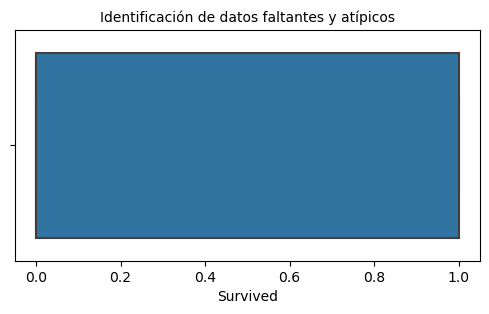

In [6]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Archivo["Survived"])
plt.title("Identificación de datos faltantes y atípicos", fontsize=10)

Text(0.5, 1.0, 'Identificación de datos faltantes y atípicos')

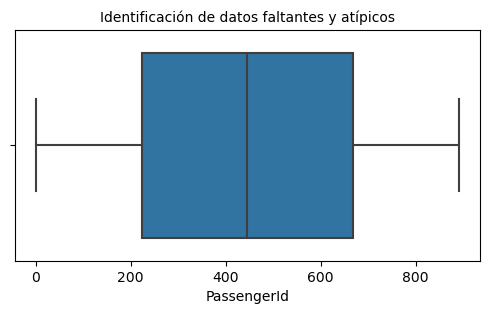

In [7]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Archivo["PassengerId"])
plt.title("Identificación de datos faltantes y atípicos", fontsize=10)

In [8]:
print("Cantidad de Registros con cero en PassengerId:",Archivo["PassengerId"].isin([0]).sum())
print("Cantidad de Registros con cero en Survived:",Archivo["Survived"].isin([0]).sum())
print("Cantidad de Registros con cero en Age:",Archivo["Age"].isin([0]).sum())
print("Cantidad de Registros con cero en Pclass:",Archivo["Pclass"].isin([0]).sum())
print("Cantidad de Registros con cero en Fare:",Archivo["Fare"].isin([0]).sum())


Cantidad de Registros con cero en PassengerId: 0
Cantidad de Registros con cero en Survived: 549
Cantidad de Registros con cero en Age: 0
Cantidad de Registros con cero en Pclass: 0
Cantidad de Registros con cero en Fare: 15


Text(0.5, 1.0, 'Identificación de datos atípicos')

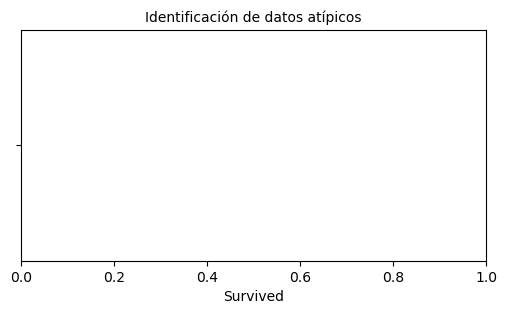

In [25]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Archivo["Survived"])
plt.title("Identificación de datos atípicos", fontsize=10)

In [26]:
nivel_minimo=20
nivel_maximo=800
Total_Atipicos=((Archivo["Survived"]<nivel_minimo)|(Archivo["Survived"]>nivel_maximo)).sum()
print("El total de datos atipicos es {}".format(Total_Atipicos))

El total de datos atipicos es 0


In [28]:
Archivo=Archivo[(Archivo["Survived"]<nivel_maximo)&(Archivo["Survived"]>nivel_minimo)]

In [30]:
Total_Atipicos=((Archivo["Survived"]<nivel_minimo)|(Archivo["Survived"]>nivel_maximo)).sum()
print("El total de datos atipicos es{}".format(Total_Atipicos))

El total de datos atipicos es0


In [31]:
Archivo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  0 non-null      int64  
 1   Survived     0 non-null      int64  
 2   Pclass       0 non-null      int64  
 3   Name         0 non-null      object 
 4   Sex          0 non-null      object 
 5   Age          0 non-null      float64
 6   SibSp        0 non-null      int64  
 7   Parch        0 non-null      int64  
 8   Ticket       0 non-null      object 
 9   Fare         0 non-null      float64
 10  Cabin        0 non-null      object 
 11  Embarked     0 non-null      object 
dtypes: float64(2), int64(5), object(5)
memory usage: 0.0+ bytes


In [32]:
Archivo["Survived"].value_counts()

Series([], Name: count, dtype: int64)

In [33]:
Archivo[["Survived"]].head(30)

,Survived
